 ## Project 1
 SMA strategy backtesting return analysis by using pyfolio

In [2]:
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import yfinance as yf
from pandas import Series, DataFrame

TSMC_price_data = yf.download('2330.TW', start = '2018-01-01', end = '2022-07-18')
TSMC_price_data['Date'] = TSMC_price_data.index
print(TSMC_price_data)
TSMC_price_data['Date'] = pd.to_datetime(TSMC_price_data['Date'], format = '%Y-%m-%d')

[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close    Volume       Date
Date                                                                   
2018-01-02  231.5  232.5  231.0  232.5  202.319672  18055269 2018-01-02
2018-01-03  236.0  238.0  235.5  237.0  206.235519  29308091 2018-01-03
2018-01-04  240.0  240.0  236.5  239.5  208.410995  29096613 2018-01-04
2018-01-05  240.0  240.0  238.0  240.0  208.846085  22438255 2018-01-05
2018-01-08  242.0  242.5  240.5  242.0  210.586502  20233692 2018-01-08
...           ...    ...    ...    ...         ...       ...        ...
2022-07-11  468.0  470.5  461.0  462.0  462.000000  21941710 2022-07-11
2022-07-12  458.0  458.0  449.5  449.5  449.500000  23036423 2022-07-12
2022-07-13  470.5  473.0  466.0  470.5  470.500000  44035695 2022-07-13
2022-07-14  466.0  477.5  463.0  475.0  475.000000  31936258 2022-07-14
2022-07-15  481.0  494.0  477.0  492.5  492.500000  51846909 2022-0

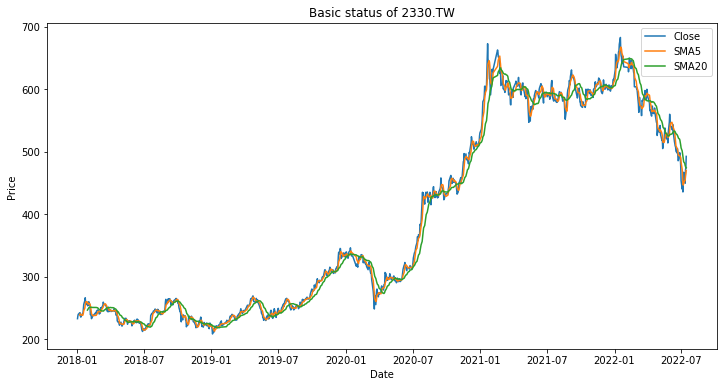

In [3]:
TSMC_price_data['Close'] = pd.to_numeric(TSMC_price_data['Close'])
TSMC_price_data['SMA5'] = TSMC_price_data['Close'].rolling(5).mean()
TSMC_price_data['SMA20'] = TSMC_price_data['Close'].rolling(20).mean()

plt.figure(figsize = (12, 6))
plt.plot(TSMC_price_data['Close'])
plt.plot(TSMC_price_data['SMA5'])
plt.plot(TSMC_price_data['SMA20'])
plt.legend(['Close', 'SMA5', 'SMA20'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Basic status of 2330.TW')
plt.show()

In [4]:
condition1 = TSMC_price_data['SMA5'] > TSMC_price_data['SMA20']
condition2 = TSMC_price_data['SMA5'] < TSMC_price_data['SMA20']
signal = []
## stock = 0

for i in range(len(TSMC_price_data)):
    if  condition1[i]:
        stock = 1
        signal.append(1)
    elif condition2[i] and stock == 1:
        stock -= 1
        signal.append(-1)
    else:
        signal.append(0)

TSMC_price_data['SMA_signal'] = pd.Series(index = TSMC_price_data.index, data = signal)

In [5]:
TSMC_price_data['return'] = TSMC_price_data['Close'].pct_change()
strat_return = np.zeros(len(TSMC_price_data))

for i in range(len(TSMC_price_data)):
    if TSMC_price_data['SMA_signal'][i] == 1:
        strat_return[i] = TSMC_price_data['return'][i]*TSMC_price_data['SMA_signal'][i]
    elif TSMC_price_data['SMA_signal'][i] == -1:
        strat_return[i] = TSMC_price_data['return'][i]*TSMC_price_data['SMA_signal'][i]

TSMC_price_data['strat_return'] = strat_return

In [7]:
# benchmark return
benchmark_return = TSMC_price_data['Close'].pct_change()
TSMC_price_data['benchmark'] = benchmark_return

/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2018-01-02
End date,2022-07-15
Total months,52
,Backtest
Annual return,29.219%
Cumulative returns,206.78%
Annual volatility,19.249%
Sharpe ratio,1.43
Calmar ratio,2.00
Stability,0.92
Max drawdown,-14.628%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,14.63,2021-04-15,2022-06-13,NaT,NaN
1,12.20,2018-02-02,2018-05-18,2018-08-29,149
2,12.18,2021-01-21,2021-01-29,2021-04-08,56
3,10.26,2020-08-10,2020-09-07,2020-11-16,71
4,8.79,2018-09-10,2019-01-16,2019-02-26,122


/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instea

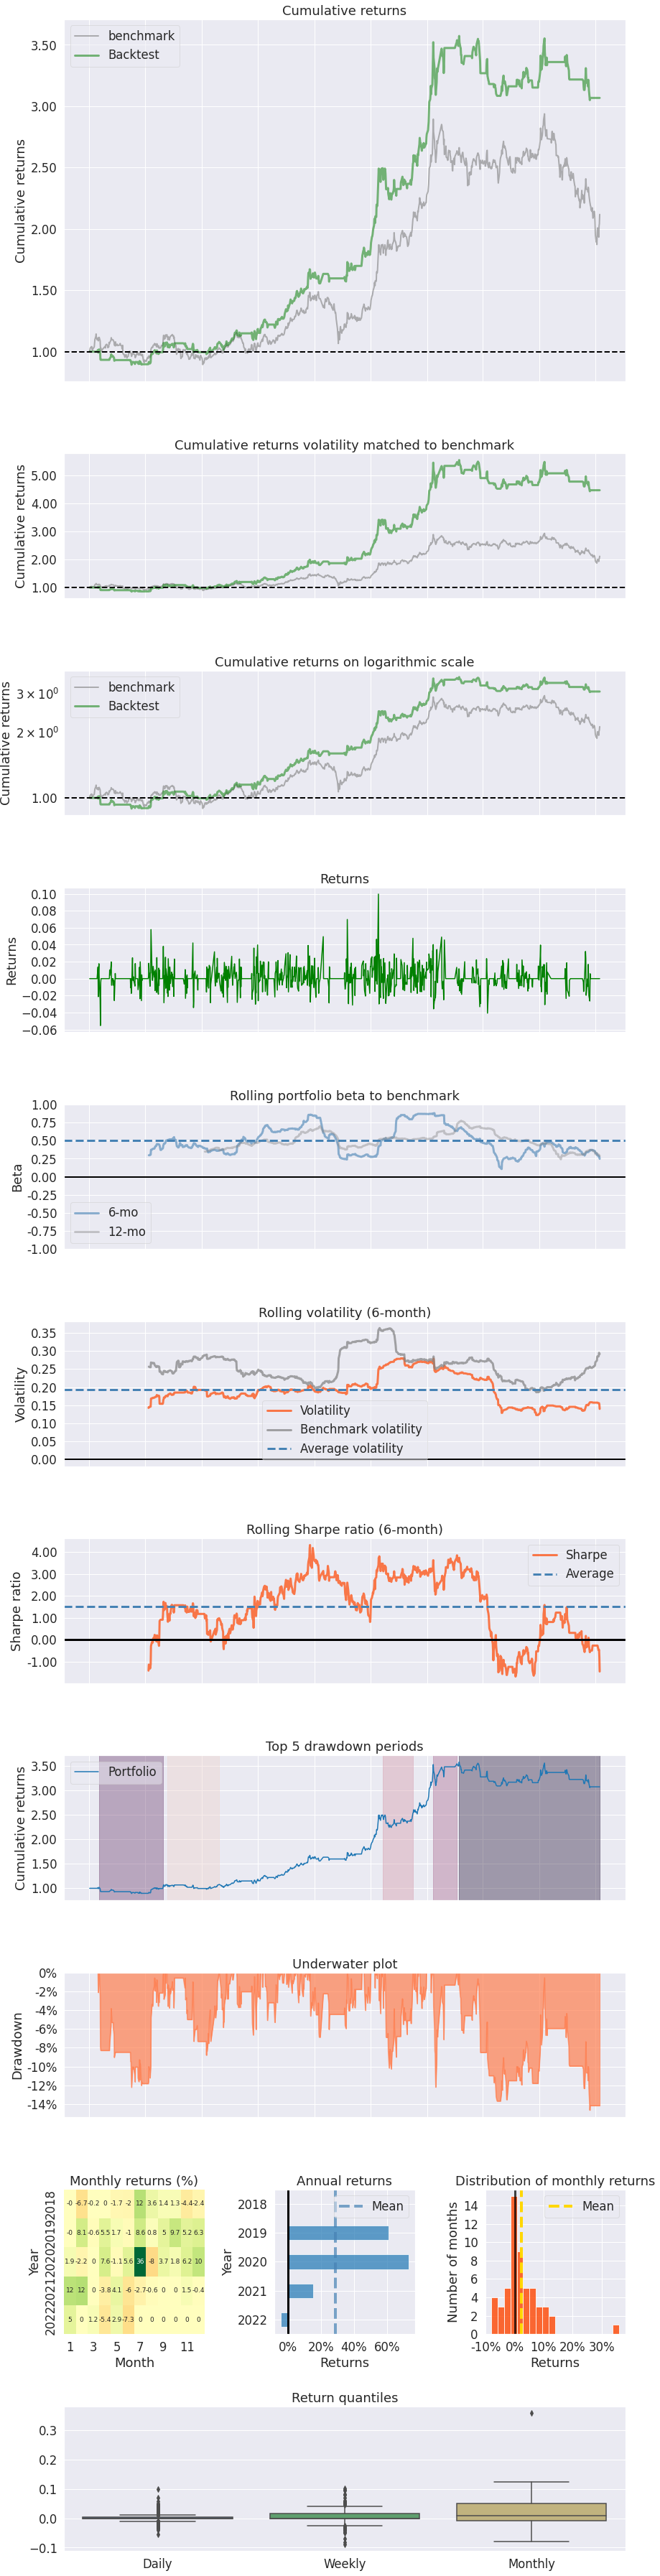

In [8]:
pf.create_returns_tear_sheet(returns = TSMC_price_data['strat_return'], benchmark_rets = TSMC_price_data['benchmark'])

In [12]:
TSMC_price_data = TSMC_price_data.drop(columns = ['High', 'Low', 'Adj Close', 'return'])
from pathlib import Path
filepath = Path('/Users/abnerteng/GitHub/TMBA-projects/data/TSMC_price_data.csv')
filepath.parent.mkdir(parents = True, exist_ok = True)
TSMC_price_data.to_csv(filepath)